In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Companies Data Preprocessing

In [2]:
companies_df = pd.read_csv(r"F:\Assignment2test\companies.csv", encoding = 'latin1')
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
companies_df['name'] = companies_df['name'].str.replace('#', '')

In [4]:
companies_df['name'] = companies_df['name'].str.replace(':', '')

In [5]:
companies_df['name'] = companies_df['name'].str.replace(',', '-')

In [6]:
companies_df['name'] = companies_df['name'].str.replace('(', '')

In [7]:
companies_df['name'] = companies_df['name'].str.replace(')', '')

In [8]:
companies_df['name'] = companies_df['name'].str.replace('.com', '')

In [9]:
companies_df['name'] = companies_df['name'].str.replace('.', '-')

In [10]:
companies_df['name'] = companies_df['name'].str.upper()

In [11]:
companies_df['name'] = companies_df['name'].str.replace('-', '')

In [12]:
# companies_df['name'] = companies_df['name'].str.replace('-INC-', '-')

In [13]:
# companies_df['name'] = companies_df['name'].str.replace('INC-', '-')

In [14]:
companies_df_copy = companies_df.copy()

In [15]:
companies_df['name'] = companies_df['name'].str.replace(' ', '')

In [16]:
companies_df['name'] = companies_df['name'].str.replace('ONEINC', '1')

In [17]:
companies_df.head(50)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,FAME,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,THEONEOFTHEMINC,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,06,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004TECHNOLOGIES,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01GAMESTECHNOLOGY,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,ONDINEBIOMEDICALINC,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2OAI,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,1,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,123LISTO,http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [18]:
companies_df ['name'].nunique()

65928

# Rounds Data Extraction and Preprocessing

In [19]:
rounds2_df = pd.read_csv("rounds2.csv", encoding = 'latin1')
rounds2_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [20]:
rounds2_df['name'] = rounds2_df['company_permalink'].apply(lambda x: x.split('/')[-1]) 

In [21]:
rounds2_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-QOUNTER
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-qounter
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,-THE-ONE-OF-THEM-INC-
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-com


In [22]:
rounds2_df['name'] = rounds2_df['name'].str.replace('-', '')

In [23]:
rounds2_df['name'] = rounds2_df['name'].str.replace(':', '')

In [24]:
rounds2_df['name'] = rounds2_df['name'].str.replace('#', '')

In [25]:
rounds2_df['name'] = rounds2_df['name'].str.replace('com', '.com')

In [26]:
rounds2_df['name'] = rounds2_df['name'].str.replace('.com', '')

In [27]:
rounds2_df['name'] = rounds2_df['name'].str.upper()

In [28]:
rounds2_df['name'] = rounds2_df['name'].str.replace('1', 'ONEINC')

In [29]:
rounds2_df['name'] = rounds2_df['name'].str.replace('ONEINC', '1')

In [30]:
rounds2_df['name'] = rounds2_df['name'].str.replace('0XDATA', 'H2OAI')

In [31]:
rounds2_df['name'] = rounds2_df['name'].str.replace('0NDINEBIOMEDICALINC', 'ONDINEBIOMEDICALINC')

In [32]:
rounds2_df.head(50)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,FAME
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,QOUNTER
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,QOUNTER
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,THEONEOFTHEMINC
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,06
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004TECHNOLOGIES
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01GAMESTECHNOLOGY
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,ONDINEBIOMEDICALINC
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,ONDINEBIOMEDICALINC
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2OAI


In [33]:
rounds2_df['name'].nunique()

67107

In [34]:
#Checking two data files have same company or not
x = set(list(companies_df ['name'].unique()))
y = set(list(rounds2_df['name'].unique()))

len(y.difference(x))

8334

In [35]:
#renameing Permalink column in rounds2 filec
rounds2_df.rename(columns = {'company_permalink':'permalink'}, inplace = True) 

In [37]:
rounds2_df_copy = rounds2_df.copy()

In [38]:
rounds2_df['permalink'] = rounds2_df['permalink'].str.upper()

In [39]:
rounds2_df.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,FAME
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,QOUNTER
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,QOUNTER
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,THEONEOFTHEMINC
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,06


In [40]:
companies_df['permalink'] = companies_df['permalink'].str.upper()

In [41]:
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,FAME,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,THEONEOFTHEMINC,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,06,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004TECHNOLOGIES,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [42]:
#Checking two data files have same company or not
x = set(list(companies_df ['permalink'].unique()))
y = set(list(rounds2_df['permalink'].unique()))

len(y.difference(x))

7

# Merging two Dataframe

In [43]:
master_frame = pd.merge(companies_df, rounds2_df, on = 'permalink', how = 'inner')

In [44]:
master_frame.shape

(114942, 16)

In [45]:
master_frame.head()

,permalink,name_x,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name_y
0,/ORGANIZATION/-FAME,FAME,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,FAME
1,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,QOUNTER
2,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,QOUNTER
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,THEONEOFTHEMINC,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,THEONEOFTHEMINC
4,/ORGANIZATION/0-6-COM,06,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,06


In [46]:
#Saving the master frame
master_frame.to_csv('master_frame.csv', index = False)

In [47]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name_x                      0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name_y                      0.00
dtype: float64

In [48]:
#Total investment on different funding types
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].sum().sort_values(ascending=False)

funding_round_type
venture                  5.901262e+11
private_equity           1.419254e+11
debt_financing           1.138848e+11
post_ipo_equity          5.161061e+10
undisclosed              3.044143e+10
post_ipo_debt            2.564309e+10
seed                     1.698824e+10
grant                    9.134424e+09
angel                    4.659255e+09
secondary_market         2.389489e+09
convertible_note         2.103126e+09
equity_crowdfunding      6.611162e+08
product_crowdfunding     5.261686e+08
non_equity_assistance    3.001782e+07
Name: raised_amount_usd, dtype: float64

In [49]:
master_frame['raised_amount_usd'].describe()

count    9.495800e+04
mean     1.042696e+07
std      1.148218e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680521e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [50]:
#Total investment on different funding types
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].median().sort_values(ascending= True)

funding_round_type
non_equity_assistance       60000.0
equity_crowdfunding        100000.0
product_crowdfunding       183915.0
grant                      201684.0
convertible_note           272000.0
seed                       275000.0
angel                      400000.0
undisclosed               1018680.0
debt_financing            1100000.0
venture                   5000000.0
post_ipo_equity          12262852.5
post_ipo_debt            19950000.0
private_equity           20000000.0
secondary_market         32600000.0
Name: raised_amount_usd, dtype: float64

<AxesSubplot:xlabel='funding_round_type'>

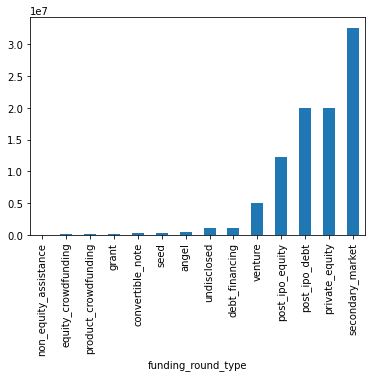

In [51]:
#Total investment on different funding types
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].median().sort_values(ascending= True).plot.bar()

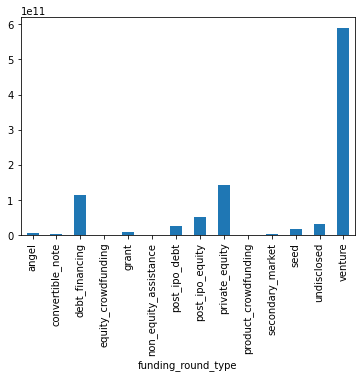

In [52]:
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].sum().plot.bar()
plt.show()

In [53]:
venture = round(5.901262*pow(10, 11), 0)
angel = round(4.659255*pow(10, 9), 0)
seed = round(1.698824*pow(10, 10), 0)
private_equity = round(1.419254*pow(10,11), 0)

print("{} investment amount in Venture".format(venture))
print("{} investment amount in Angel".format(angel))
print("{} investment amount in Seed".format(seed))
print("{} investment amount in Private Equity".format(private_equity))

590126200000.0 investment amount in Venture
4659255000.0 investment amount in Angel
16988240000.0 investment amount in Seed
141925400000.0 investment amount in Private Equity


# Top English Speaking Country

In [54]:
english_Spearking_Country = pd.read_excel(r"F:\Assignment2test\PRIMARY_ENGLISH_SPEAKING_COUNTRY.xlsx")

In [55]:
english_Spearking_Country .head()

,country_code,Primary_English
0,AUS,YES
1,NZL,YES
2,GBR,YES
3,USA,YES
4,ATG,YES


In [56]:
# master_frame = master_frame_copy

In [57]:
master_frame_copy = master_frame.copy()

In [58]:
master_frame = pd.merge(master_frame, english_Spearking_Country, on = 'country_code', how = 'left')

In [59]:
master_frame.head()

,permalink,name_x,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name_y,Primary_English
0,/ORGANIZATION/-FAME,FAME,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,FAME,YES
1,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,QOUNTER,YES
2,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,QOUNTER,YES
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,THEONEOFTHEMINC,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,THEONEOFTHEMINC,NaN
4,/ORGANIZATION/0-6-COM,06,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,06,NaN


In [60]:
master_frame['Primary_English'] = master_frame['Primary_English'].fillna("NO")

In [61]:
master_frame.head()

,permalink,name_x,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name_y,Primary_English
0,/ORGANIZATION/-FAME,FAME,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,FAME,YES
1,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,QOUNTER,YES
2,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,QOUNTER,YES
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,THEONEOFTHEMINC,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,THEONEOFTHEMINC,NO
4,/ORGANIZATION/0-6-COM,06,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,06,NO


In [62]:
#filtering only english speaking country
filter_master_dataset = master_frame[master_frame['Primary_English'] == 'YES']

In [63]:
filter_master_dataset.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    6.694821e+11
GBR    3.276705e+10
IND    2.768634e+10
CAN    1.842468e+10
SGP    4.068412e+09
AUS    3.839237e+09
IRL    2.401611e+09
NZL    1.642834e+09
GRD    7.500000e+08
Name: raised_amount_usd, dtype: float64

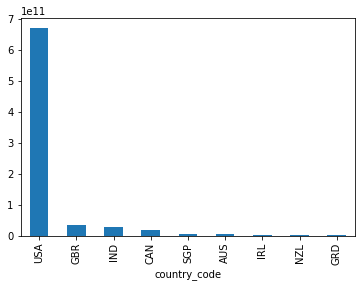

In [64]:
filter_master_dataset.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False).head(9).plot.bar()
plt.show()

# Secotr mapping from the map file

In [65]:
mapping_df = pd.read_csv(r"F:\Assignment2test\mapping.csv")

In [66]:
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [67]:
mapping_df_copy = mapping_df.copy()

In [68]:
mapping_df.set_index('category_list',inplace=True)

 

mapping_df_processed = mapping_df[mapping_df==1].stack().reset_index().drop(0,1)

In [69]:
mapping_df_processed.head()

,category_list,level_1
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [70]:
mapping_df_processed.rename(columns = {'level_1':'Main_sectors'}, inplace = True) 

In [71]:
mapping_df_processed.rename(columns = {'category_list':'Primary_Sector'}, inplace = True) 

In [72]:
mapping_df_processed.head(2)

,Primary_Sector,Main_sectors
0,NaN,Blanks
1,3D,Manufacturing


In [73]:
master_frame['Primary_Sector'] = master_frame['category_list'].str.split("|").str[0]

In [74]:
master_frame.head()

,permalink,name_x,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name_y,Primary_English,Primary_Sector
0,/ORGANIZATION/-FAME,FAME,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,FAME,YES,Media
1,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,QOUNTER,YES,Application Platforms
2,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,QOUNTER,YES,Application Platforms
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,THEONEOFTHEMINC,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,THEONEOFTHEMINC,NO,Apps
4,/ORGANIZATION/0-6-COM,06,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,06,NO,Curated Web


In [75]:
merged_frame_with_sector = pd.merge(master_frame, mapping_df_processed, on = 'Primary_Sector', how = 'left')

In [76]:
merged_frame_with_sector.shape

(114942, 19)

In [77]:
merged_frame_with_sector.head()

,permalink,name_x,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name_y,Primary_English,Primary_Sector,Main_sectors
0,/ORGANIZATION/-FAME,FAME,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,FAME,YES,Media,Entertainment
1,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,QOUNTER,YES,Application Platforms,"News, Search and Messaging"
2,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,QOUNTER,YES,Application Platforms,"News, Search and Messaging"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,THEONEOFTHEMINC,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,THEONEOFTHEMINC,NO,Apps,"News, Search and Messaging"
4,/ORGANIZATION/0-6-COM,06,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,06,NO,Curated Web,"News, Search and Messaging"


In [78]:
country1 = merged_frame_with_sector[(merged_frame_with_sector['country_code']== 'USA') & (merged_frame_with_sector['raised_amount_usd']>= 5000000) & (merged_frame_with_sector['raised_amount_usd']<= 15000000) & (merged_frame_with_sector['funding_round_type'] == 'venture') ]

In [79]:
country2 = merged_frame_with_sector[(merged_frame_with_sector['country_code']== 'GBR') & (merged_frame_with_sector['raised_amount_usd']>= 5000000) & (merged_frame_with_sector['raised_amount_usd']<= 15000000) & (merged_frame_with_sector['funding_round_type'] == 'venture') ]

In [80]:
country3 = merged_frame_with_sector[(merged_frame_with_sector['country_code']== 'IND') & (merged_frame_with_sector['raised_amount_usd']>= 5000000) & (merged_frame_with_sector['raised_amount_usd']<= 15000000) & (merged_frame_with_sector['funding_round_type'] == 'venture') ]

In [81]:
country1['funding_round_type'].count()

12150

In [82]:
country2['funding_round_type'].count()

628

In [83]:
country3['funding_round_type'].count()

330

In [84]:
country1['raised_amount_usd'].sum()

108531347515.0

In [85]:
country2['raised_amount_usd'].sum()

5436843539.0

In [86]:
country3['raised_amount_usd'].sum()

2976543602.0

In [87]:
country1.groupby(['Main_sectors'])['raised_amount_usd'].count().sort_values(ascending=False)

Main_sectors
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    2115
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Blanks                                       86
Name: raised_amount_usd, dtype: int64

In [88]:
country2.groupby(['Main_sectors'])['raised_amount_usd'].count().sort_values(ascending=False)

Main_sectors
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising    120
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Blanks                                       7
Name: raised_amount_usd, dtype: int64

In [89]:
country3.groupby(['Main_sectors'])['raised_amount_usd'].count().sort_values(ascending=False)

Main_sectors
Others                                     109
News, Search and Messaging                  52
Social, Finance, Analytics, Advertising     50
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Blanks                                       2
Name: raised_amount_usd, dtype: int64

In [90]:
country1_highest_investment_in_Others_sector = country1[(country1['Main_sectors'] == 'Others') & (country1['funding_round_type'] == 'venture') ]

In [91]:
country1_highest_investment_in_Others_sector.head(10)

,permalink,name_x,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name_y,Primary_English,Primary_Sector,Main_sectors
103,/ORGANIZATION/128-TECHNOLOGY,128TECHNOLOGY,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,128TECHNOLOGY,YES,Service Providers,Others
134,/ORGANIZATION/170-SYSTEMS,170SYSTEMS,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.0,170SYSTEMS,YES,Software,Others
140,/ORGANIZATION/17ZUOYE,17ZUOYE,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,A,01-01-2011,5000000.0,17ZUOYE,YES,Education,Others
141,/ORGANIZATION/17ZUOYE,17ZUOYE,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,B,01-09-2013,10000000.0,17ZUOYE,YES,Education,Others
191,/ORGANIZATION/1STDIBS,1STDIBS,http://www.1stdibs.com,E-Commerce,operating,USA,NY,New York City,New York,01-01-2001,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,C,24-01-2014,15000000.0,1STDIBS,YES,E-Commerce,Others
339,/ORGANIZATION/2U,2UINC,http://2u.com,EdTech|Education|Software,ipo,USA,MD,MD - Other,Hyattsville,01-01-2008,/funding-round/27a95d0c30dc3973c48cbd363df0a900,venture,D,21-10-2013,5100000.0,2U,YES,EdTech,Others
341,/ORGANIZATION/2U,2UINC,http://2u.com,EdTech|Education|Software,ipo,USA,MD,MD - Other,Hyattsville,01-01-2008,/funding-round/54874a891ac80a0a6b87e6a8eaf79fe8,venture,A,21-06-2009,10000000.0,2U,YES,EdTech,Others
428,/ORGANIZATION/3CROWD-TECHNOLOGIES,XDN/3CROWDTECHNOLOGIES,http://www.3crowd.com,Enterprise Software,acquired,USA,CA,SF Bay Area,San Mateo,01-01-2010,/funding-round/7e23cf22ef559e7661b14b6a3edf6ea3,venture,A,13-04-2010,6620000.0,3CROWDTECHNOLOGIES,YES,Enterprise Software,Others
514,/ORGANIZATION/3LEAF,3LEAF,http://www.3leafsystems.com,Web Hosting,acquired,USA,CA,SF Bay Area,Santa Clara,01-06-2004,/funding-round/922e9e181fbd969dea0d5e47550c1ec8,venture,A,01-01-2005,10000000.0,3LEAF,YES,Web Hosting,Others
546,/ORGANIZATION/3SI-SECURITY-SYSTEMS,3SISECURITYSYSTEMS,https://www.3sisecurity.com/,Physical Security|Security,operating,USA,PA,Philadelphia,Malvern,01-01-1971,/funding-round/eecf7b57ea8520963860756d625703b9,venture,NaN,29-07-2002,13000000.0,3SISECURITYSYSTEMS,YES,Physical Security,Others


In [92]:
country1_highest_investment_in_Others_sector.groupby('name_y')['raised_amount_usd'].sum().sort_values(ascending=False)

name_y
VIRTUSTREAM               64300000.0
CAPELLA                   54968051.0
AIRTIGHTNETWORKS          54201907.0
DECARTA                   52100000.0
BLACKDUCKSOFTWARE         51000000.0
                             ...    
PATIENTACCESSSOLUTIONS     5000000.0
CX                         5000000.0
TANVAS                     5000000.0
READYPULSE                 5000000.0
PETSCHOICE                 5000000.0
Name: raised_amount_usd, Length: 2044, dtype: float64

In [93]:
country2_highest_investment_in_Others_sector = country2[(country2['Main_sectors'] == 'Others') & (country2['funding_round_type'] == 'venture') ]

In [94]:
country2_highest_investment_in_Others_sector.groupby('name_y')['raised_amount_usd'].sum().sort_values(ascending=False)

name_y
ELECTRICCLOUD             37000000.0
SENSAGE                   36250000.0
ENIGMATIC                 32500000.0
SILVERRAILTECHNOLOGIES    29000000.0
OPENCLOUD                 27972766.0
                             ...    
BULLGUARD                  5000000.0
PARCELGENIE                5000000.0
BACULASYSTEMS              5000000.0
UDEX                       5000000.0
VECTORWATCH                5000000.0
Name: raised_amount_usd, Length: 117, dtype: float64

In [95]:
country3_highest_investment_in_Others_sector = country3[(country3['Main_sectors'] == 'Others') & (country3['funding_round_type'] == 'venture') ]

In [96]:
country3_highest_investment_in_Others_sector.groupby('name_y')['raised_amount_usd'].sum().sort_values(ascending=False)

name_y
MYNTRA                           38000000.0
FIRSTCRYCOM                      29000000.0
MONFLOOR                         25400000.0
ITZCASHCARDLTD                   25000000.0
NXTGENDATACENTERCLOUDSERVICES    22300000.0
                                    ...    
URBANLADDER                       5000000.0
TASTYKHANA                        5000000.0
VOONIK                            5000000.0
REZNEXT                           5000000.0
LIASESFORAS                       5000000.0
Name: raised_amount_usd, Length: 91, dtype: float64

In [97]:
countryall = merged_frame_with_sector[(merged_frame_with_sector['funding_round_type'] == 'venture') & ((merged_frame_with_sector['country_code'] == 'IND')|
                                     (merged_frame_with_sector['country_code'] == 'USA')|
                                     (merged_frame_with_sector['country_code'] == 'GBR'))]

In [98]:
countryall.head()

,permalink,name_x,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name_y,Primary_English,Primary_Sector,Main_sectors
0,/ORGANIZATION/-FAME,FAME,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,FAME,YES,Media,Entertainment
1,/ORGANIZATION/-QOUNTER,QOUNTER,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,QOUNTER,YES,Application Platforms,"News, Search and Messaging"
5,/ORGANIZATION/004-TECHNOLOGIES,004TECHNOLOGIES,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004TECHNOLOGIES,YES,Software,Others
10,/ORGANIZATION/0XDATA,H2OAI,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2OAI,YES,Analytics,NaN
11,/ORGANIZATION/0XDATA,H2OAI,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2OAI,YES,Analytics,NaN


In [99]:
country1_highest_investment_in_Cleantech_Semiconductors_sector = country1[(country1['Main_sectors'] == 'Cleantech / Semiconductors') & (country1['funding_round_type'] == 'venture') ]

In [100]:
country1_highest_investment_in_Cleantech_Semiconductors_sector.groupby('name_y')['raised_amount_usd'].sum().sort_values(ascending=False)

name_y
BIODESIX                75300000.0
TIGOENERGY              68739496.0
FORSIGHTLABS            61300001.0
RHEONIX                 56124758.0
SCIENERGY               55375423.0
                           ...    
SOFIEBIOSCIENCES         5000000.0
NANOSOLAR                5000000.0
SLATEPHARMACEUTICALS     5000000.0
NANOSPHERE               5000000.0
1BOG                     5000000.0
Name: raised_amount_usd, Length: 1585, dtype: float64

In [101]:
country2_highest_investment_in_Cleantech_Semiconductors_sector = country2[(country2['Main_sectors'] == 'Cleantech / Semiconductors') & (country2['funding_round_type'] == 'venture') ]

In [102]:
country2_highest_investment_in_Cleantech_Semiconductors_sector.groupby('name_y')['raised_amount_usd'].sum().sort_values(ascending=False)

name_y
EUSAPHARMA                                               35600000.0
HORIZONDISCOVERY                                         31353719.0
FSTARBIOTECHNOLOGISCHEFORSCHUNGSUNDENTWICKLUNGSGESMBH    29132906.0
ELIXENT                                                  25000000.0
TAKEDACAMBRIDGE                                          22340000.0
                                                            ...    
LAMELLARBIOMEDICAL                                        5301059.0
MMICSOLUTIONS                                             5250000.0
FLOWLINE                                                  5104587.0
IGNISENERGY                                               5014644.0
EXCOINTOUCH                                               5000000.0
Name: raised_amount_usd, Length: 104, dtype: float64

In [103]:
country3_highest_investment_in_News_Search_Messaging_sector = country3[(country3['Main_sectors'] == 'News, Search and Messaging') & (country3['funding_round_type'] == 'venture') ]

In [104]:
country3_highest_investment_in_News_Search_Messaging_sector.groupby('name_y')['raised_amount_usd'].sum().sort_values(ascending=False)

name_y
GUPSHUPTECHNOLOGYINDIAPVTLTD    33000000.0
IMIMOBILE                       23000000.0
SMSGUPSHUP                      22000000.0
ROADRUNNR                       21000000.0
HIKE                            21000000.0
BLUESTONECOM                    15000000.0
MOBILE2WININDIA                 15000000.0
GURUJI                          15000000.0
QUIKRINDIA                      14000000.0
MATRIMONYCOM                    11750000.0
BHARATMATRIMONY                 11750000.0
TELEDNA                         10490000.0
JUSTDIAL                        10000000.0
FOURINTERACTIVE                 10000000.0
PEPPERTAP                       10000000.0
ONE97MUNICATIONS                10000000.0
MONEYONMOBILE                   10000000.0
URBANCLAP                       10000000.0
WEBSHASTRAPVTLTD                10000000.0
BABAJOB                         10000000.0
MATRIMONY                        8650000.0
SHADOWFAXTECHNOLOGIES            8500000.0
PEOPLEINTERACTIVEINDIA           8000000.0
EZET

<AxesSubplot:xlabel='country_code,Main_sectors'>

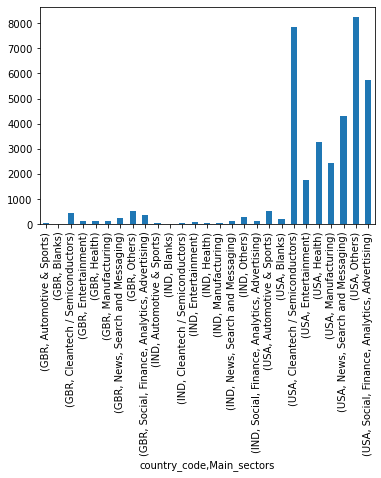

In [105]:
countryall.groupby(['country_code', 'Main_sectors'])['raised_amount_usd'].count().plot.bar()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


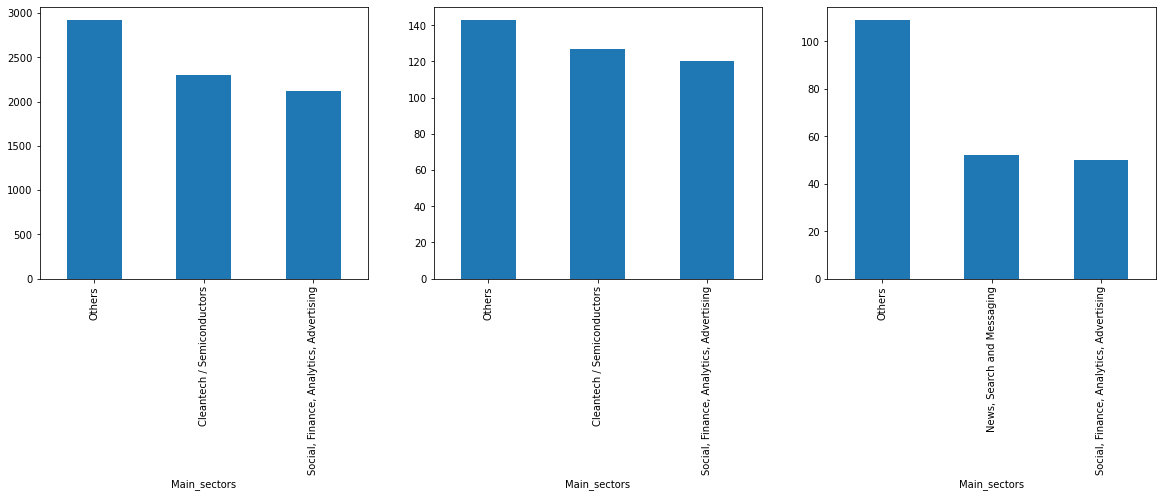

In [106]:
fig, axes = plt.subplots(1,3,figsize=(20,5), squeeze=False)

country1.groupby(['Main_sectors'])['Main_sectors'].count().sort_values(ascending=False).head(3).plot(ax=axes[0,0], kind = 'bar')
country2.groupby(['Main_sectors'])['raised_amount_usd'].count().sort_values(ascending=False).head(3).plot(ax =axes[0,1], kind = 'bar')
country3.groupby(['Main_sectors'])['raised_amount_usd'].count().sort_values(ascending=False).head(3).plot(ax =axes[0,2], kind = 'bar')
fig.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


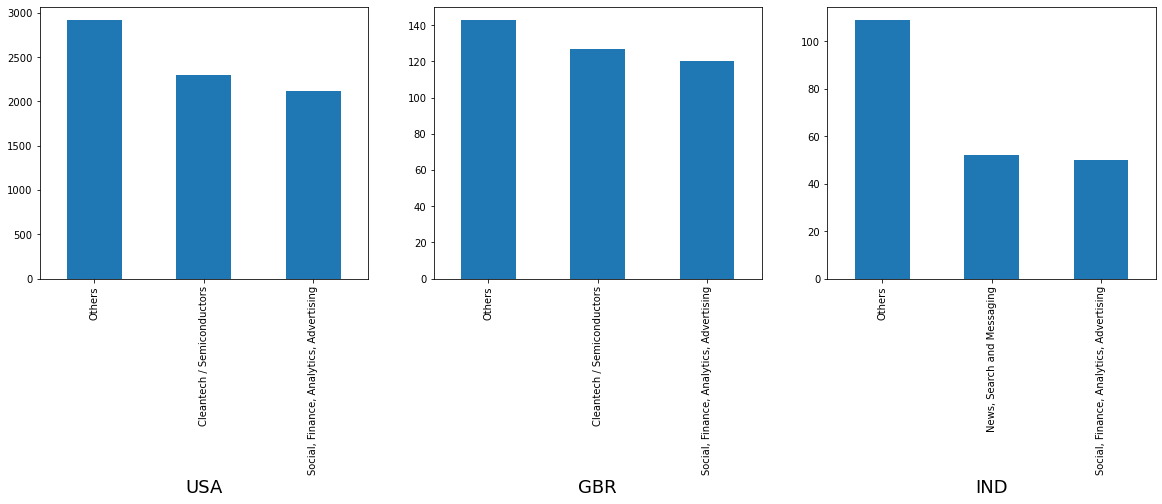

In [107]:
fig, axes = plt.subplots(1,3,figsize=(20,5), squeeze=False)
country1.groupby(['Main_sectors'])['Main_sectors'].count().sort_values(ascending=False).head(3).plot(ax=axes[0,0], kind = 'bar')
country2.groupby(['Main_sectors'])['raised_amount_usd'].count().sort_values(ascending=False).head(3).plot(ax =axes[0,1], kind = 'bar')
country3.groupby(['Main_sectors'])['raised_amount_usd'].count().sort_values(ascending=False).head(3).plot(ax =axes[0,2], kind = 'bar')

axes[0][0].set_xlabel('USA', fontsize=18)
axes[0][1].set_xlabel('GBR', fontsize=18)
axes[0][2].set_xlabel('IND', fontsize=18)
fig.show()